![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [19]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [20]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [21]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [22]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

<Axes: title={'center': 'Sentiminetos por aerolínea'}, xlabel='airline'>

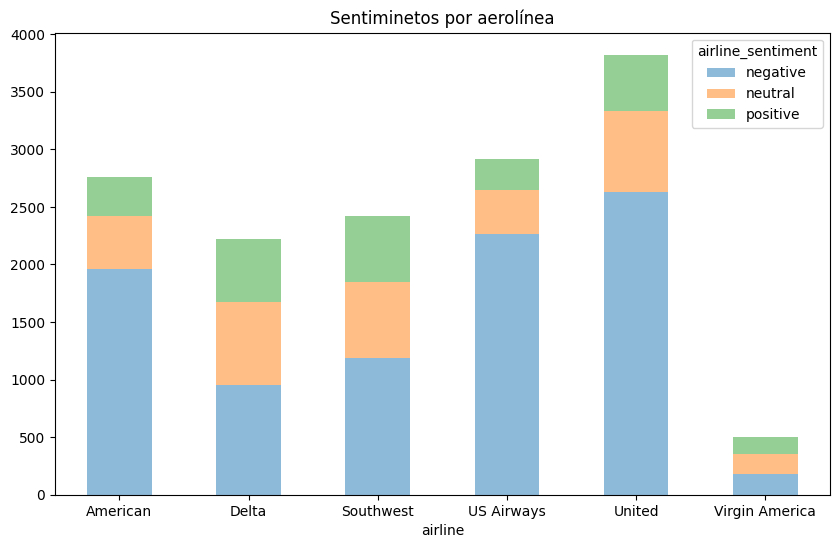

In [23]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [25]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [26]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [27]:
# Celda 1
# UTILIZAR COUNTVECTORIZER
vectorizer = CountVectorizer()

# TRASNFORMACIÓN DE DATOS
X_train_trans = vectorizer.fit_transform(X_train)
X_test_trans = vectorizer.transform(X_test)

# CLASIFICADOR
classifier = RandomForestClassifier(random_state=24)
classifier.fit(X_train_trans, y_train)

# DESEMPEÑO
y_pred = classifier.predict(X_test_trans)
accuracy_countvect = accuracy_score(y_test, y_pred)
print(f'Accuracy del Modelo CountVectorizer: {accuracy_countvect}')

Accuracy del Modelo CountVectorizer & StopWords: 0.7684188741721855


### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [28]:
# Celda 2
# UTILIZAR COUNTVECTORIZER & STOPWORDS
vectorizer = CountVectorizer(stop_words='english')

# TRASNFORMACIÓN DE DATOS
X_train_trans = vectorizer.fit_transform(X_train)
X_test_trans = vectorizer.transform(X_test)

# CLASIFICADOR
classifier = RandomForestClassifier(random_state=24)
classifier.fit(X_train_trans, y_train)

# DESEMPEÑO
y_pred = classifier.predict(X_test_trans)
accuracy_countvect_stopwords = accuracy_score(y_test, y_pred)
print(f'Accuracy del Modelo CountVectorizer & StopWords: {accuracy_countvect_stopwords}')

Accuracy del Modelo CountVectorizer & StopWords: 0.7615894039735099


### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [29]:
from nltk.tokenize import word_tokenize
import nltk

nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
# Celda 3
# UTILIZAR COUNTVECTORIZER & LEMANTIZACIÓN
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [wordnet_lemmatizer.lemmatize(token, pos='v') for token in tokens]
    return ' '.join(lemmatized_tokens)

X_train_lemmatized = X_train.apply(lemmatize_text)
X_test_lemmatized = X_test.apply(lemmatize_text)

vectorizer = CountVectorizer()

# TRASNFORMACIÓN DE DATOS
X_train_trans = vectorizer.fit_transform(X_train_lemmatized)
X_test_trans = vectorizer.transform(X_test_lemmatized)

# CLASIFICADOR
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_trans, y_train)

# DESEMPEÑO
y_pred = classifier.predict(X_test_trans)
accuracy_countvect_lemm = accuracy_score(y_test, y_pred)
print("Accuracy del modelo de Random Forest & Lematización", accuracy_countvect_lemm)

Accuracy del modelo de Random Forest & Lematización 0.7758692052980133


### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [31]:
# Celda 4

# UTILIZAR COUNTVECTORIZER & STOPWORDS & LEMANTIZACIÓN
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train_lemmatized)
X_test_vec = vectorizer.transform(X_test_lemmatized)

# CLASIFICADOR
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_vec, y_train)

# DESEMPEÑO
y_pred = classifier.predict(X_test_vec)
accuracy_total = accuracy_score(y_test, y_pred)
print("Accuracy del modelo de Random Forest & StopWords & Lematización", accuracy_total)

Accuracy del modelo de Random Forest & StopWords & Lematización 0.7622102649006622


### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

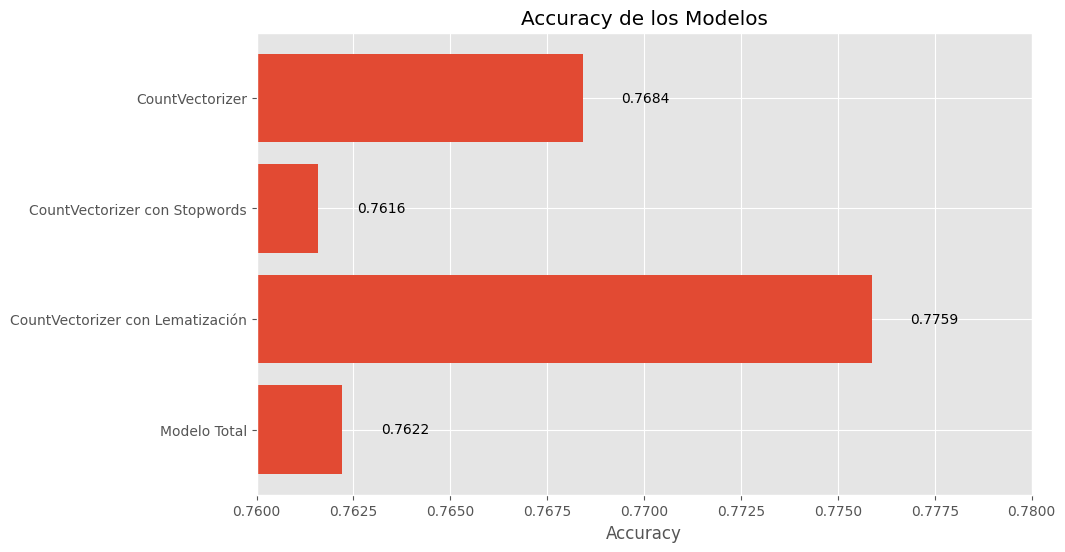

In [42]:
# Celda 5
import matplotlib.pyplot as plt
plt.style.use('ggplot')

results = [accuracy_countvect, accuracy_countvect_stopwords, accuracy_countvect_lemm, accuracy_total]
models = ['CountVectorizer', 'CountVectorizer con Stopwords', 'CountVectorizer con Lematización', 'Modelo Total']

# Graficar los resultados en una gráfica de barras horizontal
plt.figure(figsize=(10, 6))
bars = plt.barh(models, results,)
plt.xlabel('Accuracy')
plt.title('Accuracy de los Modelos')
plt.xlim(0.76, 0.78)  # Establecer límites en el eje x de 0 a 1
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar el modelo con el mayor accuracy en la parte superior

# Agregar los valores de precisión a las barras
for bar, result in zip(bars, results):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, f'{result:.4f}', va='center')

plt.show()

La gráfica muestra la métrica de accuracy para distintos modelos de clasificación utilizando Random Forest en su versión por defecto, en cada modelo se utilizan distintas técnicas de transformación de los textos.

1. **CountVectorizer**: Tiene la segunda mejor precisión de 0.7684. Uiliza la representación más básica del texto, contanto la frecuencia de cada palabra.
    - Ventaja: Ofrece un buen rendimiento, indicando que para el conjunto de datos la simplicidad puede ser suficiente para capturar las caracterisiticas relevantes del problema.
    - Desventaja: Es suceptible a ruido y palabras irrevevantes que pueden no contribuir a la predición. 

2. **CountVectorizer + Lemantización**: Presenta la mejor precisión con un valor de 0.7759. El modelo procesos el texto convirtiendo las palabras a su raiz.
    - Ventaja: Se mejora la generalización del modelo y se puede reducir la dimensionalidad de los datos de entrada.
    - Desventaja: El proceso de lematización puede ser costoso en término de computación y es posible que mejora el modelo dado que puede convertir variablas palabras a una misma. 

3. **CountVectorizer + Stopwords**: El modelo elimina las palabras más comunes que no contribuyen significativamente al significado del texto. Es el tercer modelo con un accuracy de 0.7616.
   - Ventajas: Al eliminar palabras que se consideran "ruido" en el texto, el modelo puede enfocarse en palabras más significativas.
   - Desventajas: La eliminación de palabras puede llevar a la pérdida de información contextual que podría ser útil para ciertas tareas de clasificación, como en este caso, el análisis de sentimientos.

4. **Modelo Total**: Este modelo tiene una precisión de 0.7622, utilizando una combinación de las configuraciones anteriores.
   - Ventajas: Puede estar reduciendo la dimensionalidad de las entradas, al eliminar palabras utlizando stopwords o lematización, esto indica que una reducción de dimensionalidad no afecta significativamente los resultados del modelo. 
   - Desventajas: Al incorporarse varias técnicas no necesariamente puede traducirse en una mejora del rendimiento del modelo y podría requirir incluso más recursos de computación para realizar los preprocesamientos, estoy tambien podría ser contraprucedente para el mantenimiento como tal del modelo. 

Finalmente, el ejercio puede realizarse utilizando por ejemplo un cross-validation para encontrar en el modelo que valores maximizan los accuracy, se utilizo la config. por defecto para explorar de primera mano el comportamiento del accuracy para todos los preprocesamientos en la muestra de test, por incluso con algún cross-validation-score puede que hayan resultados diferentes a este. 